<a href="https://colab.research.google.com/github/nurilhaidar/PCVK/blob/main/Week12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import cv2 as cv
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

**<h4>1. FACE DETECTION<h4>**

In [24]:
def face_recognition(img, scaleFactor, minNeighbors):
  img_rectangle = img.copy()
  img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
  haar_cascade = cv.CascadeClassifier('/content/drive/MyDrive/Images/Face Detection/haarcascade_frontalface_alt.xml')
  rectangle = haar_cascade.detectMultiScale(img_gray, scaleFactor, minNeighbors)
  for (x, y, w, h) in rectangle:
    cv.rectangle(img_rectangle, (x, y), (x+w, y+h), (0, 255, 0), 3)

  fig, ax = plt.subplots(1,2)
  ax[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
  ax[0].set_xticks([])
  ax[0].set_yticks([])
  ax[1].imshow(cv.cvtColor(img_rectangle, cv.COLOR_BGR2RGB))
  ax[1].set_xticks([])
  ax[1].set_yticks([])

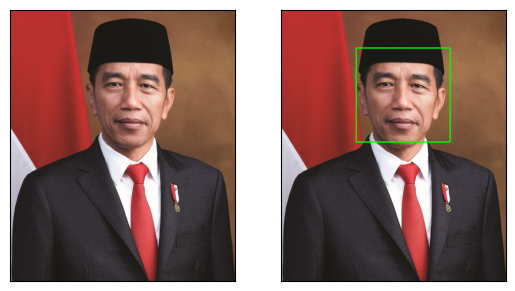

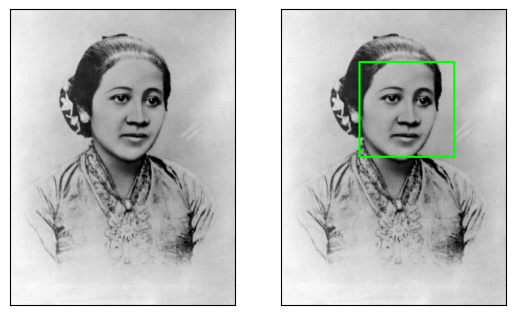

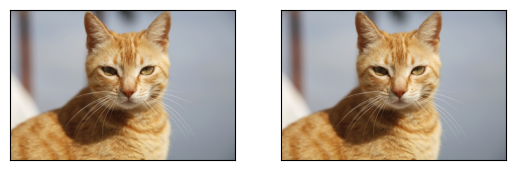

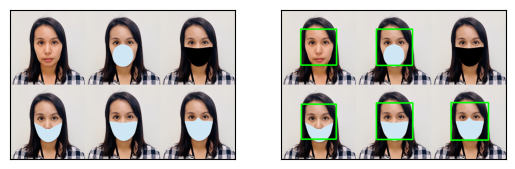

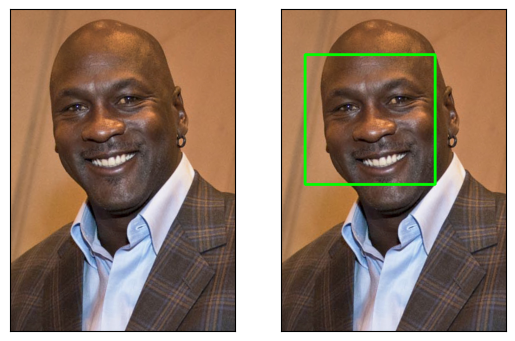

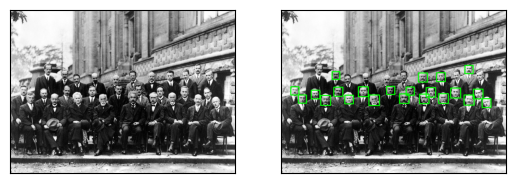

In [27]:
face_recognition(cv.imread('/content/drive/MyDrive/Images/Face Detection/jokowi.jpg'), 1.1, 9)
face_recognition(cv.imread('/content/drive/MyDrive/Images/Face Detection/kartini.jpg'), 1.1, 9)
face_recognition(cv.imread('/content/drive/MyDrive/Images/Face Detection/mycat.jpg'), 1.1, 9)
face_recognition(cv.imread('/content/drive/MyDrive/Images/Face Detection/mask.png'), 1.1, 9)
face_recognition(cv.imread('/content/drive/MyDrive/Images/Face Detection/mjordan.jpg'), 1.1, 9)
face_recognition(cv.imread('/content/drive/MyDrive/Images/Face Detection/solvayconf.jpg'), 1.1, 9)

**<h4>2. CAT DETECTION<h4>**

In [30]:
def face_recognition_cat(img, scaleFactor, minNeighbors):
  img_rectangle = img.copy()
  img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
  haar_cascade = cv.CascadeClassifier('/content/drive/MyDrive/Images/Face Detection/haarcascade_frontalcatface.xml')
  rectangle = haar_cascade.detectMultiScale(img_gray, scaleFactor, minNeighbors)
  for (x, y, w, h) in rectangle:
    cv.rectangle(img_rectangle, (x, y), (x+w, y+h), (0, 255, 0), 3)

  fig, ax = plt.subplots(1,2)
  ax[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
  ax[0].set_xticks([])
  ax[0].set_yticks([])
  ax[1].imshow(cv.cvtColor(img_rectangle, cv.COLOR_BGR2RGB))
  ax[1].set_xticks([])
  ax[1].set_yticks([])

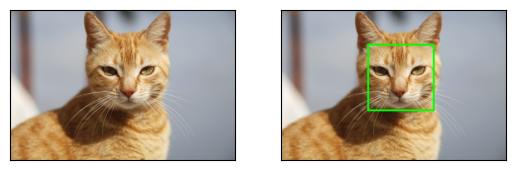

In [39]:
face_recognition_cat(cv.imread('/content/drive/MyDrive/Images/Face Detection/mycat.jpg'), 1.1, 50)

**<h4>3. EYES DETECTION<h4>**

In [42]:
def eyes_recognition(img, scaleFactor, minNeighbors):
  img_rectangle = img.copy()
  img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
  haar_cascade = cv.CascadeClassifier('/content/drive/MyDrive/Images/Face Detection/haarcascade_eye.xml')
  rectangle = haar_cascade.detectMultiScale(img_gray, scaleFactor, minNeighbors)
  for (x, y, w, h) in rectangle:
    cv.rectangle(img_rectangle, (x, y), (x+w, y+h), (0, 255, 0), 3)

  fig, ax = plt.subplots(1,2)
  ax[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
  ax[0].set_xticks([])
  ax[0].set_yticks([])
  ax[1].imshow(cv.cvtColor(img_rectangle, cv.COLOR_BGR2RGB))
  ax[1].set_xticks([])
  ax[1].set_yticks([])

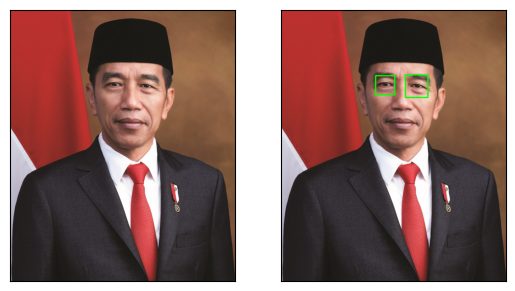

In [43]:
eyes_recognition(cv.imread('/content/drive/MyDrive/Images/Face Detection/jokowi.jpg'), 1.1, 9)

**<h4>4. FACE TRACKING<h4>**

In [44]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

**<h4>5. FACE DETECTION WITH SMILE<h4>**

In [68]:
def face_recognition_smile(img, scaleFactor, minNeighbors):
  img_rectangle = img.copy()
  img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
  haar_cascade = cv.CascadeClassifier('/content/drive/MyDrive/Images/Face Detection/haarcascade_frontalface_alt.xml')
  rectangle = haar_cascade.detectMultiScale(img_gray, scaleFactor, minNeighbors)

  smile = cv.imread('/content/drive/MyDrive/Images/Face Detection/smile.png')
  for (x, y, w, h) in rectangle:
    smile_resize = cv.resize(smile, (w, h))
    img_rectangle[y:y+h, x:x+w] = smile_resize

  fig, ax = plt.subplots(1,2)
  ax[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
  ax[0].set_xticks([])
  ax[0].set_yticks([])
  ax[1].imshow(cv.cvtColor(img_rectangle, cv.COLOR_BGR2RGB))
  ax[1].set_xticks([])
  ax[1].set_yticks([])

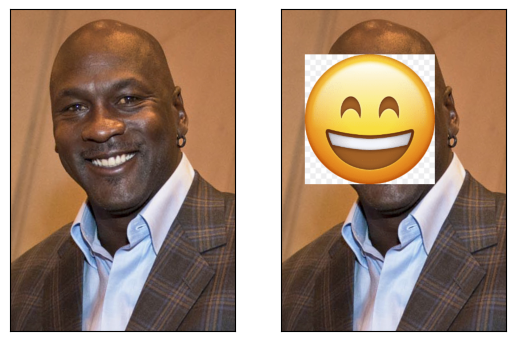

In [69]:
face_recognition_smile(cv.imread('/content/drive/MyDrive/Images/Face Detection/mjordan.jpg'), 1.1, 9)

**<h4>6. FACE DETECTION AND EYES DETECTION<h4>**

In [93]:
def face_recognition_eyes_detection(img, scaleFactor, minNeighbors):
  img_rectangle = img.copy()
  img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
  face_recog = cv.CascadeClassifier('/content/drive/MyDrive/Images/Face Detection/haarcascade_frontalface_alt.xml')
  eyes_recog = cv.CascadeClassifier('/content/drive/MyDrive/Images/Face Detection/haarcascade_eye.xml')
  right_eye_recog = cv.CascadeClassifier('/content/drive/MyDrive/Images/Face Detection/haarcascade_righteye_2splits.xml')

  rectangle_face = face_recog.detectMultiScale(img_gray, scaleFactor, minNeighbors)
  rectangle_eyes = eyes_recog.detectMultiScale(img_gray, scaleFactor, minNeighbors)
  rectangle_right_eyes = right_eye_recog.detectMultiScale(img_gray, scaleFactor, minNeighbors)

  for (x, y, w, h) in rectangle_face:
    cv.rectangle(img_rectangle, (x, y), (x+w, y+h), (0, 0, 0), 1)

  for (x, y, w, h) in rectangle_eyes:
    cv.rectangle(img_rectangle, (x, y), (x+w, y+h), (255, 255, 255), 1)

  for (x, y, w, h) in rectangle_right_eyes:
    cv.rectangle(img_rectangle, (x, y), (x+w, y+h), (0, 0, 255), 2)

  cv2_imshow(img_rectangle)

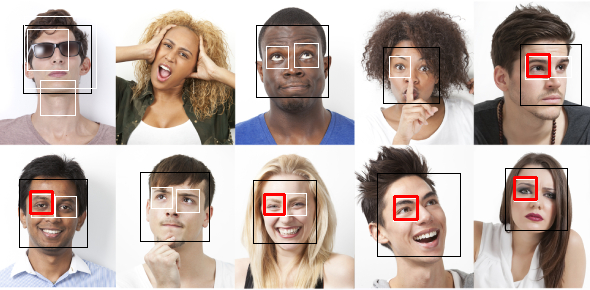

In [94]:
face_recognition_eyes_detection(cv.imread('/content/drive/MyDrive/Images/Face Detection/people.jpg'), 1.1, 3)